# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuidos según una N(1.5, 2.5)
* Ye = 8 + 2.0 * x + e
* e estará distribuida según una N(0, 0.8)

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = 1.5 + 2.5*np.random.randn(100)

In [3]:
#Residuos
res = 0 + 0.8*np.random.randn(100)

In [15]:
y_pred = 8 + 2.0*x

In [16]:
y_act = 8 + 2.0*x + res

In [17]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [18]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [19]:
data.head()

,x,y_actual,y_prediccion
0,2.015363,12.487722,12.030727
1,-2.318739,2.430136,3.362521
2,-0.150125,7.000415,7.699750
3,0.817354,8.562393,9.634708
4,1.777774,11.557119,11.555547


In [26]:
y_mean = [np.mean(y_act) for i in range(1,len(x_list) + 1)]

In [20]:
%matplotlib inline

Text(0.5,1,'Valor Actual vs Predicción')

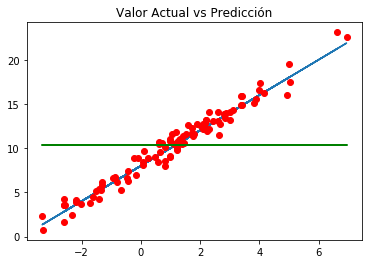

In [32]:
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [33]:
data["SSR"] = (data["y_prediccion"] - np.mean(y_act))**2
data["SSD"] = (data["y_prediccion"] - data["y_actual"])**2
data["SST"] = (data["y_actual"] - np.mean(y_act))**2

In [34]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.015363,12.487722,12.030727,2.900291,0.208845,4.665683
1,-2.318739,2.430136,3.362521,48.513755,0.869342,62.371558
2,-0.150125,7.000415,7.699750,6.906135,0.489070,11.070845
3,0.817354,8.562393,9.634708,0.480243,1.149857,3.116318
4,1.777774,11.557119,11.555547,1.507601,0.000002,1.511463


In [35]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [36]:
SSR

1818.2538320191638

In [37]:
SSD

67.61954104115503

In [38]:
SST

1928.9773636112775

In [39]:
SSR + SSD

1885.873373060319

In [40]:
R2 = SSR/SST

In [41]:
R2

0.9425998802884727

(array([51., 17.,  9.,  7.,  1.,  6.,  5.,  0.,  1.,  3.]),
 array([2.47020627e-06, 3.48684187e-01, 6.97365904e-01, 1.04604762e+00,
        1.39472934e+00, 1.74341105e+00, 2.09209277e+00, 2.44077449e+00,
        2.78945621e+00, 3.13813792e+00, 3.48681964e+00]),
 <a list of 10 Patch objects>)

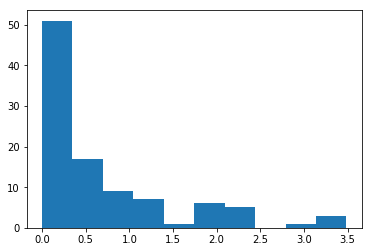

In [42]:
plt.hist(data["SSD"])

(array([ 3., 11., 12., 18., 20., 12., 12.,  7.,  2.,  3.]),
 array([-1.84854024, -1.47695594, -1.10537164, -0.73378734, -0.36220303,
         0.00938127,  0.38096557,  0.75254987,  1.12413417,  1.49571847,
         1.86730277]),
 <a list of 10 Patch objects>)

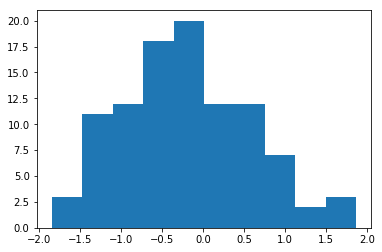

In [43]:
plt.hist(data["y_prediccion"] - data["y_actual"])